In [44]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1]:
data = pd.read_csv('../data/weather_partial_mean_all_best_close/01.csv', index_col = 0)

In [6]:
data = data.set_index('date')

del data['codesum']
del data['sunrise']
del data['year']
del data['tavg']
del data['sealevel']
del data['stnpressure']
del data['wetbulb']
del data['depart']
del data['snowfall']
del data['sunset']
del data['day']

In [7]:
data.head()

,station_nbr,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,snowfall,...,sealevel,resultspeed,resultdir,avgspeed,year,month,day,sunset,codesum,sunrise
date,,,,,,,,,,,,,,,,,,,,,
2012-01-01,1,52.0,31.0,42.0,8.0,36.0,40.0,23.0,0.0,0.0,...,29.92,3.6,20.0,4.6,2012,1,1,-,RA FZFG BR,-
2012-01-02,1,50.0,31.0,41.0,11.0,26.0,35.0,24.0,0.0,0.0,...,29.62,9.8,24.0,10.3,2012,1,2,-,,-
2012-01-03,1,32.0,11.0,22.0,6.0,4.0,18.0,43.0,0.0,0.0,...,29.87,10.8,31.0,11.6,2012,1,3,-,,-
2012-01-04,1,28.0,9.0,19.0,2.0,1.0,14.0,46.0,0.0,0.8,...,30.03,6.3,27.0,8.3,2012,1,4,-,,-
2012-01-05,1,38.0,25.0,32.0,1.0,13.0,25.0,33.0,0.0,0.1,...,29.84,6.9,25.0,7.8,2012,1,5,-,,-


In [8]:
data_1 = pd.read_csv('../data/weather_v1.csv', index_col = 0)

In [9]:
data_1.head()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,dayofweek,is_holiday
0,1,2012-01-01,52,31,42,M,36,40,23,0,...,Not_MO,M,0.05,29.78,29.92,3.6,20,4.6,Sun,holiday
1,2,2012-01-01,48,33,41,16,37,39,24,0,...,Not_MO,0.0,0.07,28.82,29.91,9.1,23,11.3,Sun,holiday
2,3,2012-01-01,55,34,45,9,24,36,20,0,...,MO,0.0,0.00,29.77,30.47,9.9,31,10.0,Sun,holiday
3,4,2012-01-01,63,47,55,4,28,43,10,0,...,MO,0.0,0.00,29.79,30.48,8.0,35,8.2,Sun,holiday
4,6,2012-01-01,63,34,49,0,31,43,16,0,...,MO,0.0,0.00,29.95,30.47,14.0,36,13.8,Sun,holiday


In [23]:
data['codesum'] = data_1['codesum']

In [24]:
data['is_holiday'] = data_1['is_holiday']

In [25]:
data['dayofweek'] = data_1['dayofweek']

In [27]:
data.head()

,station_nbr,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,snowfall,...,avgspeed,year,month,day,sunset,codesum,sunrise,is_holiday,dayofweek,store_nbr
0,1,52.0,31.0,42.0,8.0,36.0,40.0,23.0,0.0,0.0,...,4.6,2012,1,1,-,Not_MO,-,holiday,Sun,1
1,1,50.0,31.0,41.0,11.0,26.0,35.0,24.0,0.0,0.0,...,10.3,2012,1,2,-,Not_MO,-,holiday,Sun,1
2,1,32.0,11.0,22.0,6.0,4.0,18.0,43.0,0.0,0.0,...,11.6,2012,1,3,-,MO,-,holiday,Sun,1
3,1,28.0,9.0,19.0,2.0,1.0,14.0,46.0,0.0,0.8,...,8.3,2012,1,4,-,MO,-,holiday,Sun,1
4,1,38.0,25.0,32.0,1.0,13.0,25.0,33.0,0.0,0.1,...,7.8,2012,1,5,-,MO,-,holiday,Sun,1


In [28]:
train = pd.read_csv('../data/basic/train.csv', index_col = 0 )

In [29]:
key = pd.read_csv('../data/basic/key.csv', index_col= 0)

In [30]:
key = key.reset_index()

In [31]:
data = pd.merge(data,key, on = 'station_nbr')

In [32]:
train = train.reset_index()

In [33]:
data.reset_index(drop = True)

,station_nbr,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,snowfall,...,year,month,day,sunset,codesum,sunrise,is_holiday,dayofweek,store_nbr_x,store_nbr_y
0,1,52.0,31.0,42.0,8.0,36.0,40.0,23.0,0.0,0.0,...,2012,1,1,-,Not_MO,-,holiday,Sun,1,1
1,1,50.0,31.0,41.0,11.0,26.0,35.0,24.0,0.0,0.0,...,2012,1,2,-,Not_MO,-,holiday,Sun,1,1
2,1,32.0,11.0,22.0,6.0,4.0,18.0,43.0,0.0,0.0,...,2012,1,3,-,MO,-,holiday,Sun,1,1
3,1,28.0,9.0,19.0,2.0,1.0,14.0,46.0,0.0,0.8,...,2012,1,4,-,MO,-,holiday,Sun,1,1
4,1,38.0,25.0,32.0,1.0,13.0,25.0,33.0,0.0,0.1,...,2012,1,5,-,MO,-,holiday,Sun,1,1
5,1,46.0,25.0,36.0,4.0,21.0,29.0,29.0,0.0,0.0,...,2012,1,6,-,MO,-,holiday,Sun,1,1
6,1,57.0,28.0,43.0,5.0,28.0,36.0,22.0,0.0,0.0,...,2012,1,7,-,Not_MO,-,holiday,Sun,1,1
7,1,45.0,27.0,36.0,1.0,22.0,32.0,29.0,0.0,0.1,...,2012,1,8,-,Not_MO,-,holiday,Sun,1,1
8,1,39.0,23.0,31.0,4.0,12.0,25.0,34.0,0.0,0.0,...,2012,1,9,-,Not_MO,-,holiday,Sun,1,1
9,1,47.0,29.0,38.0,1.0,24.0,32.0,27.0,0.0,0.1,...,2012,1,10,-,Not_MO,-,holiday,Sun,1,1


In [80]:
tuples = list(zip(train_data['date'], train_data['item_nbr']))
index = pd.MultiIndex.from_tuples(tuples, names = ['date', 'item_nbr'])
result_df = pd.DataFrame(train_data, index = index, columns=['station_nbr', 'store_nbr', 'units','depart', 'avgspeed', 'cool','dewpoint', 'heat','preciptotal', 'resultdir', 'resultspeed', 'tmax', 'tmin', 'codesum', 'is_holiday'])

In [81]:
col_list = ['station_nbr','store_nbr', 'units', 'avgspeed', 'cool','dewpoint', 'heat','preciptotal', 'resultdir', 'resultspeed', 'tmax', 'tmin', 'codesum', 'is_holiday']

for c in col_list:
    result_df[c] = list(train_data[c])


In [82]:
result_df.tail()

station_nbr  store_nbr  units  avgspeed  cool  dewpoint  \
date       item_nbr                                                            
2014-10-31 107                16         45      0       5.3   0.0      35.0   
           108                16         45      0       5.3   0.0      35.0   
           109                16         45      0       5.3   0.0      35.0   
           110                16         45      0       5.3   0.0      35.0   
           111                16         45      0       5.3   0.0      35.0   

                     heat  preciptotal  resultdir  resultspeed  tmax  tmin  \
date       item_nbr                                                          
2014-10-31 107       21.0          0.0        3.0          4.5  53.0  34.0   
           108       21.0          0.0        3.0          4.5  53.0  34.0   
           109       21.0          0.0        3.0          4.5  53.0  34.0   
           110       21.0          0.0        3.0          4.5  53.0  34.0   
           111       21.0          0.0        3.0          4.5  53.0  34.0   

                    codesum is_holiday  
date       item_nbr                     
2014-10-31 107       Not_MO    workday  
           108       Not_MO    workday  
           109       Not_MO    workday  
           110       Not_MO    workday  
           111       Not_MO    workday

In [83]:
result_df_1 = result_df[result_df['station_nbr'].isin([1])]

In [ ]:
result_df_1.tail()

station_nbr  store_nbr  units  avgspeed  cool  dewpoint  \
date       item_nbr                                                            
2014-10-31 107                 1          1      0       5.8   0.0      36.0   
           108                 1          1      0       5.8   0.0      36.0   
           109                 1          1      0       5.8   0.0      36.0   
           110                 1          1      0       5.8   0.0      36.0   
           111                 1          1      0       5.8   0.0      36.0   

                     heat  preciptotal  resultdir  resultspeed  tmax  tmin  \
date       item_nbr                                                          
2014-10-31 107       18.0          0.0        4.0          5.4  53.0  40.0   
           108       18.0          0.0        4.0          5.4  53.0  40.0   
           109       18.0          0.0        4.0          5.4  53.0  40.0   
           110       18.0          0.0        4.0          5.4  53.0  40.0   
           111       18.0          0.0        4.0          5.4  53.0  40.0   

                    codesum is_holiday  
date       item_nbr                     
2014-10-31 107       Not_MO    workday  
           108       Not_MO    workday  
           109       Not_MO    workday  
           110       Not_MO    workday  
           111       Not_MO    workday

In [34]:
tuples = list(zip(train_data['date'],train_data['store_nbr']))
index = pd.MultiIndex.from_tuples(tuples, names = ['date','store_nbr'])
train_df = pd.DataFrame(train_data, index = index, columns=['station_nbr','item_nbr', 'units','depart', 'avgspeed', 'cool','dewpoint', 'heat','preciptotal', 'resultdir', 'resultspeed', 'tmax', 'tmin', 'codesum','dayofweek', 'is_holiday'])

col_list = ['station_nbr','item_nbr','units', 'depart', 'avgspeed', 'cool','dewpoint', 'heat','preciptotal', 'resultdir', 'resultspeed', 'tmax', 'tmin', 'codesum','dayofweek', 'is_holiday']

for c in col_list:
    train_df[c] = list(train_data[c])

NameError: name 'train_data' is not defined

In [ ]:
train_df_1 = train_df[train_df['station_nbr'].isin([1])]

In [ ]:
train_df_1 = train_df_1[train_df_1['units']>0]

In [ ]:
model2 = sm.OLS.from_formula("units ~ C(item_nbr) + C(is_holiday) + scale(I(avgspeed**3)) + scale(I(cool**3)) + scale(I(dewpoint)**3) + scale(I(preciptotal**2)) + scale(I(tmax**3))", data = train_df_1)

In [ ]:
result_model2 = model2.fit()

In [ ]:
print(result_model2.summary())

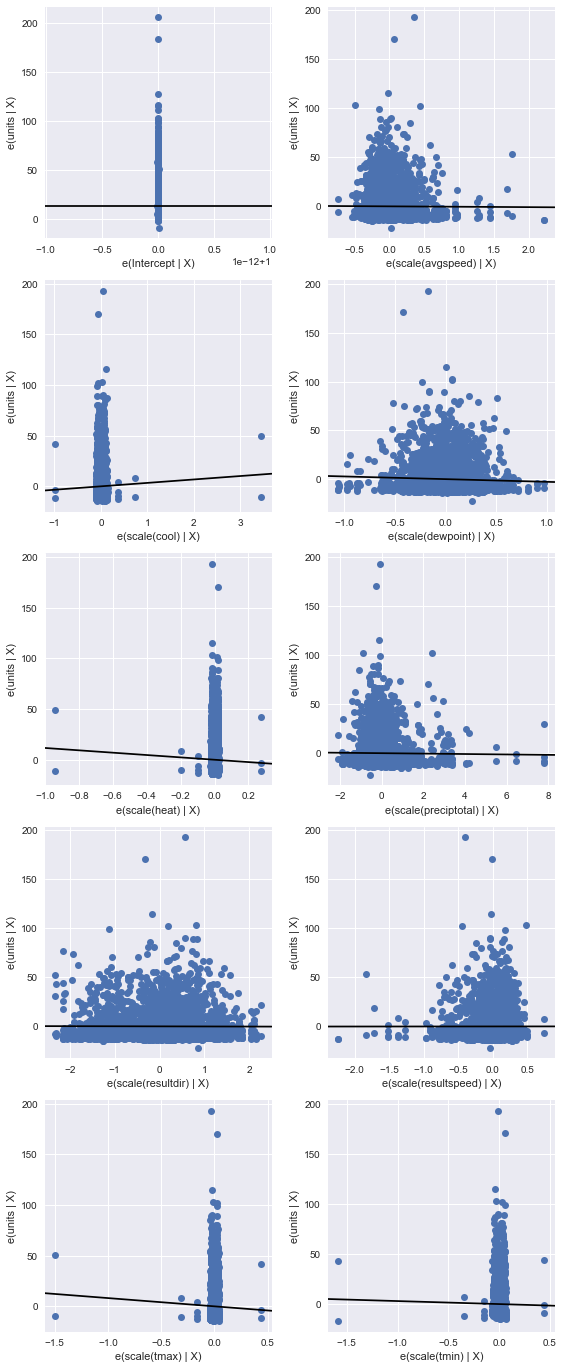

In [136]:
fig = plt.figure(figsize = (8,20))
sm.graphics.plot_partregress_grid(result_model2, fig=fig)
fig.suptitle("")
plt.show()

In [116]:
model3 = sm.OLS.from_formula("units ~ C(item_nbr) + C(codesum) + C(is_holiday) + avgspeed + cool + dewpoint + heat + preciptotal + resultdir + resultspeed + tmax + tmin", data = train_df)

In [117]:
print(model3.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     5736.
Date:                Sun, 11 Mar 2018   Prob (F-statistic):               0.00
Time:                        18:16:40   Log-Likelihood:            -1.6744e+07
No. Observations:             4617600   AIC:                         3.349e+07
Df Residuals:                 4617454   BIC:                         3.349e+07
Df Model:                         145                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [84]:
from sklearn.datasets import load_boston

In [85]:
boston = load_boston()

In [87]:
dfX0_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX_boston = sm.add_constant(dfX0_boston)
dfy_boston = pd.DataFrame(boston.target, columns=["MEDV"])
df_boston = pd.concat([dfX_boston, dfy_boston], axis=1)

In [88]:
df_boston

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,1.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1.0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,1.0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,1.0,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,1.0,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,1.0,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,1.0,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,1.0,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,1.0,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,1.0,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9
